# Load libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# ***Data Loading***

In [2]:
rdata = "processed.cleveland2.csv"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df  = pd.read_csv(rdata, names=column_names)

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


# Shape of the data

In [5]:
df.shape

(303, 14)

# Descriptive statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,130.676568,21.734575,0.0,120.0,130.0,140.0,200.0
chol,303.0,575.722772,5730.863994,126.0,211.0,241.0,275.0,99999.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,808.409241,8098.820289,71.0,133.5,153.0,166.0,99999.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Class distribution

In [7]:
print(df.groupby('num').size())

num
0    164
1     55
2     36
3     35
4     13
dtype: int64


<AxesSubplot:xlabel='num', ylabel='count'>

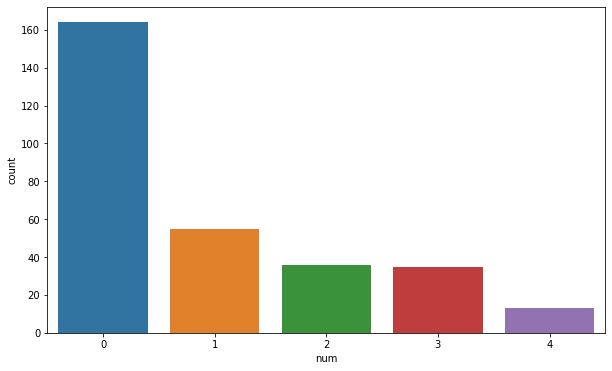

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='num', data=df)

# Identify Missing Values

In [9]:
raw_indices=df.loc[(df.values==99999).any(axis=1)].index.tolist()
print(raw_indices)

[132, 254, 281]


In [10]:
No_of_missing_value1 = (df ==0).sum()
No_of_missing_value1

age           0
sex          97
cp            0
trestbps      3
chol          0
fbs         258
restecg     151
thalach       0
exang       204
oldpeak      99
slope         0
ca            0
thal          0
num         164
dtype: int64

In [11]:
No_of_missing_value2 = (df== 99999).sum() 
No_of_missing_value2

age         0
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
No_of_missing_value3 =  (df=='?').sum() 
No_of_missing_value3

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

# ***Data Visualization***

In [13]:
from scipy.stats import skew 
print(df.skew(axis = 0, numeric_only=True ))

age         -0.209060
sex         -0.774935
cp          -0.841754
trestbps    -1.683536
chol        17.404759
fbs          1.986652
restecg      0.019900
thalach     12.246898
exang        0.742532
oldpeak      1.269720
slope        0.508316
num          1.058496
dtype: float64


# Density Plot

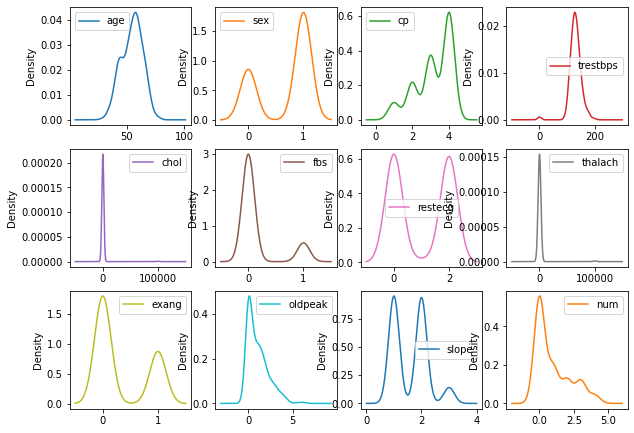

In [14]:
import matplotlib.pyplot as plt
import numpy as np
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Histograms

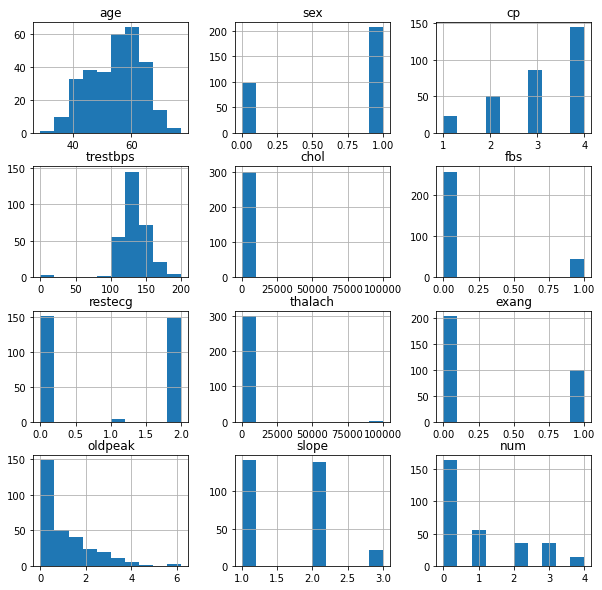

In [15]:
df.hist(figsize=(10,10))
plt.show()

# Box and whisker plots

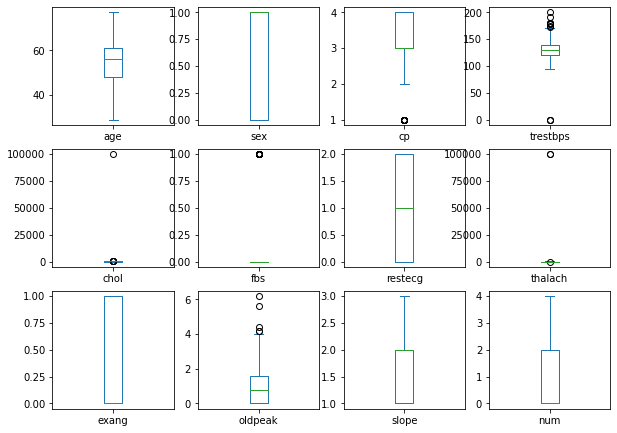

In [16]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Create a correlation heatmap

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.097542,0.104139,0.254735,-0.071013,0.118530,0.148868,-0.149539,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.016749,0.037656,0.047862,0.021647,0.055774,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036888,0.051145,-0.039975,0.067505,-0.056908,0.384060,0.202277,0.152050,0.407075
trestbps,0.254735,-0.016749,-0.036888,1.000000,-0.040649,0.161484,0.103360,-0.002581,0.052541,0.175221,0.090700,0.126223
chol,-0.071013,0.037656,0.051145,-0.040649,1.000000,-0.023929,-0.055776,-0.004722,-0.039508,0.008378,0.037293,-0.043307
fbs,0.118530,0.047862,-0.039975,0.161484,-0.023929,1.000000,0.069564,-0.034051,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.103360,-0.055776,0.069564,1.000000,0.000567,0.084867,0.114133,0.133946,0.183696
thalach,-0.149539,0.055774,-0.056908,-0.002581,-0.004722,-0.034051,0.000567,1.000000,-0.057829,-0.074045,-0.080642,-0.063439
exang,0.091661,0.146201,0.384060,0.052541,-0.039508,0.025665,0.084867,-0.057829,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.175221,0.008378,0.005747,0.114133,-0.074045,0.288223,1.000000,0.577537,0.504092


<AxesSubplot:>

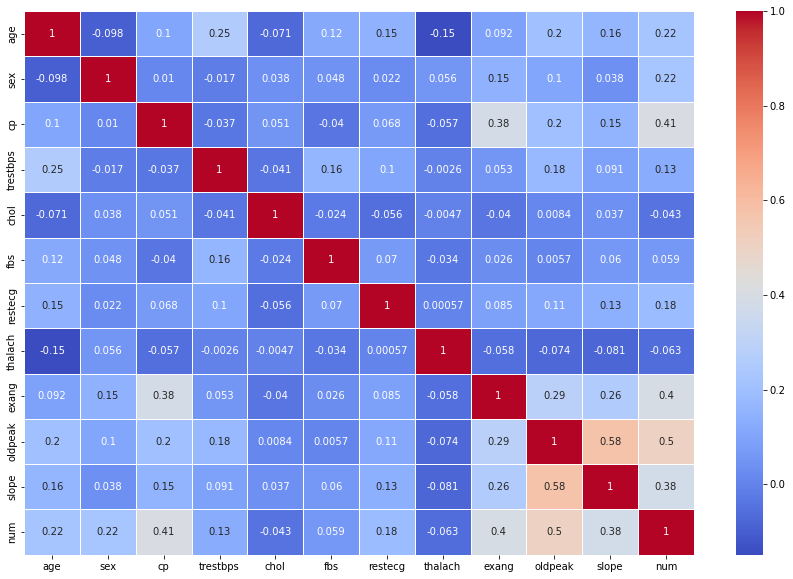

In [18]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=.5)

# Scatter plot matrix

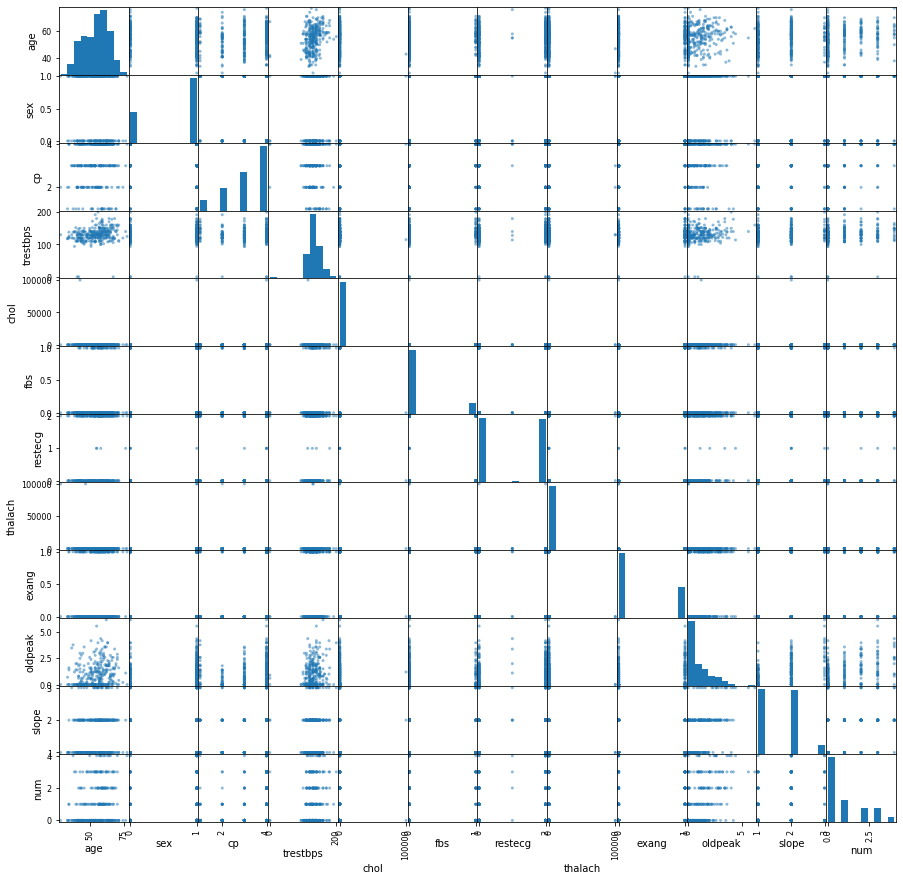

In [19]:
scatter_matrix(df,figsize=(15, 15))
plt.show()

# ***Data Cleaning & Preprocessing***

In [20]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df1 = pd.read_csv("processed.cleveland2.csv", names=column_names, na_values=["?"])
df1[['trestbps']]=df1[['trestbps']].replace(0,np.nan)
df1[['chol','thalach']]=df1[['chol','thalach']].replace(99999,np.nan)
df1.dropna(inplace=True)

In [21]:
No_of_missing_value4 =  (df1=='?').sum() 
No_of_missing_value4

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [22]:
df1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0


In [23]:
df1.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,57,0,4,140.0,241.0,0,0,123.0,1,0.2,2,0.0,7.0,1
298,45,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0.0,7.0,1
299,68,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2.0,7.0,2
300,57,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1.0,7.0,3
301,57,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1.0,3.0,1


# Descriptive statistics

In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,291.0,54.742268,8.884638,34.0,48.0,56.0,61.0,77.0
sex,291.0,0.676976,0.468437,0.0,0.0,1.0,1.0,1.0
cp,291.0,3.158076,0.966202,1.0,3.0,3.0,4.0,4.0
trestbps,291.0,132.065292,17.662522,94.0,120.0,130.0,140.0,200.0
chol,291.0,247.219931,52.189374,126.0,211.5,242.0,275.5,564.0
fbs,291.0,0.147766,0.355480,0.0,0.0,0.0,0.0,1.0
restecg,291.0,0.996564,0.994808,0.0,0.0,1.0,2.0,2.0
thalach,291.0,149.326460,22.702422,71.0,133.5,152.0,165.0,195.0
exang,291.0,0.329897,0.470985,0.0,0.0,0.0,1.0,1.0
oldpeak,291.0,1.068041,1.172784,0.0,0.0,0.8,1.8,6.2


# Check Null value

In [25]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [79]:
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# ***Data Visualization After Cleaning the data***

# Density Plot

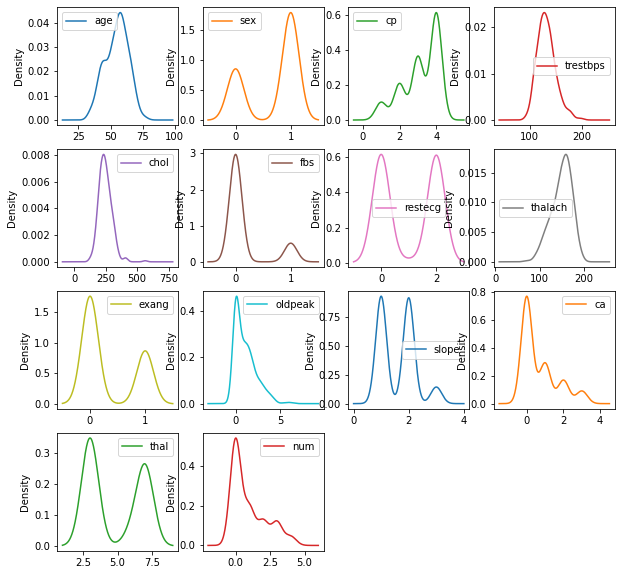

In [26]:
import matplotlib.pyplot as plt
import numpy as np
df1.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Histograms

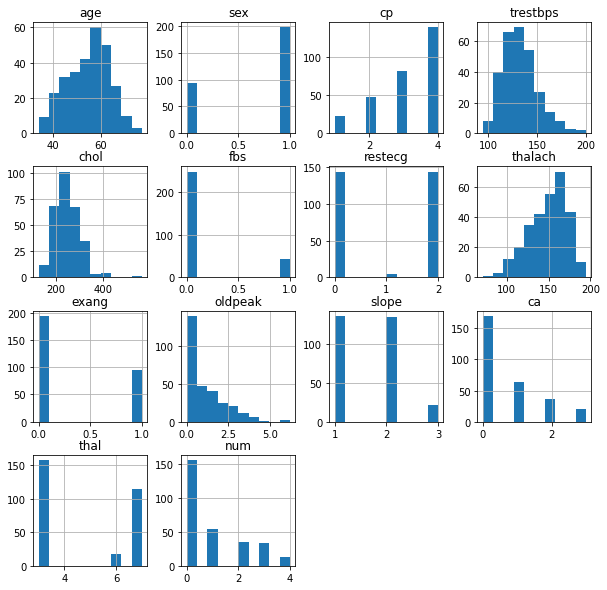

In [27]:
df1.hist(figsize=(10,10))
plt.show()

# Box and whisker plots

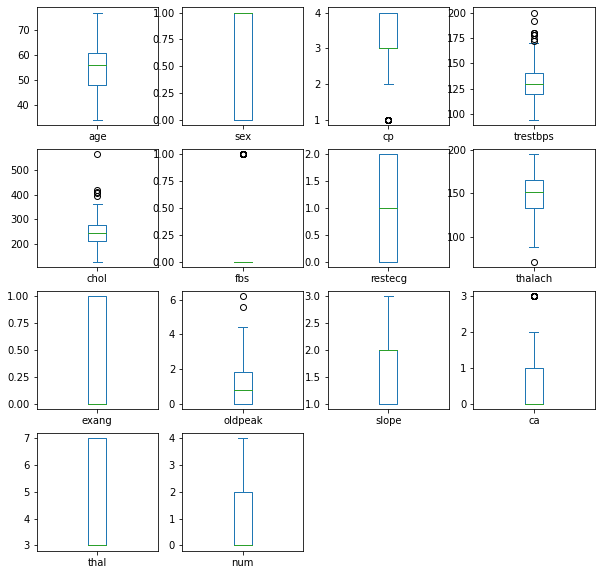

In [28]:
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Scatter plot matrix

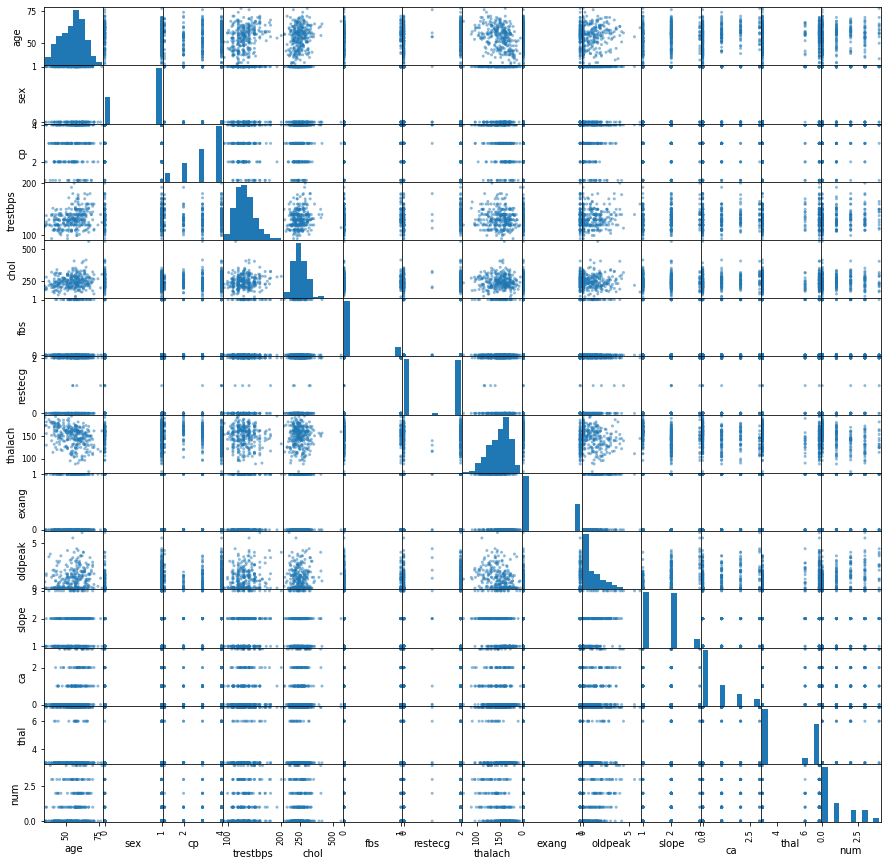

In [29]:
scatter_matrix(df1,figsize=(15, 15))
plt.show()

# Model Accuracy Before feature extraction 
# And considering all classes

In [80]:
# Spot Check Algorithms
array = df1.values
X = array[:,0:13]
y = array[:,13]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.473810 (0.099864)
SVM: 0.527143 (0.020817)


# Model Accuracy After Removing some attributes
# And Considering all classes

In [30]:
array = df1.values
X = array[:,0:8]
y = array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.591429 (0.087321)
SVM: 0.620714 (0.020731)


# One Hot Encoding

In [31]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2 = pd.read_csv("processed.cleveland.data", names=column_names, na_values=["?"])
#df2[['trestbps']]=df2[['trestbps']].replace(0,np.nan)
#df2[['chol','thalach']]=df2[['chol','thalach']].replace(99999,np.nan)
df2.dropna(inplace=True)
df2 = pd.get_dummies(df2, columns=['cp'], dummy_na=False)
df2 = pd.get_dummies(df2, columns=['sex'], dummy_na=False)
df2 = pd.get_dummies(df2, columns=['fbs'], dummy_na=False)
df2 = pd.get_dummies(df2, columns=['exang'], dummy_na=False)
df2 = pd.get_dummies(df2, columns=['restecg'], dummy_na=False)
df2 = pd.get_dummies(df2, columns=['slope'], dummy_na=False)
df2 = pd.get_dummies(df2, columns=['ca'], dummy_na=False)
df2 = pd.get_dummies(df2, columns=['thal'], dummy_na=False)
df2.head()

,age,trestbps,chol,thalach,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


# Convert the 5 class into 2 class (0 is one class and (1,2,3,4) is another class)

In [32]:
df2['num'] = df2.apply(lambda x: (1 if x['num']>0 else 0), axis=1)
df2.head(5)

,age,trestbps,chol,thalach,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [33]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2
num,297.0,0.461279,0.499340,0.0,0.0,0.0,1.0,1.0
cp_1.0,297.0,0.077441,0.267741,0.0,0.0,0.0,0.0,1.0
cp_2.0,297.0,0.164983,0.371792,0.0,0.0,0.0,0.0,1.0
cp_3.0,297.0,0.279461,0.449492,0.0,0.0,0.0,1.0,1.0
cp_4.0,297.0,0.478114,0.500364,0.0,0.0,0.0,1.0,1.0


# Check Data balance in each class

<AxesSubplot:xlabel='num', ylabel='count'>

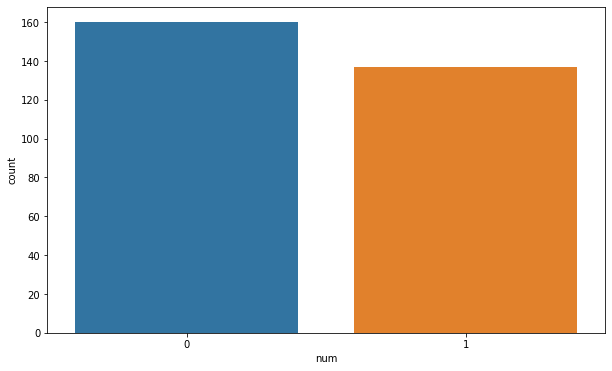

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='num', data=df2)

# Check Correlation and Correlation Matrix

<AxesSubplot:>

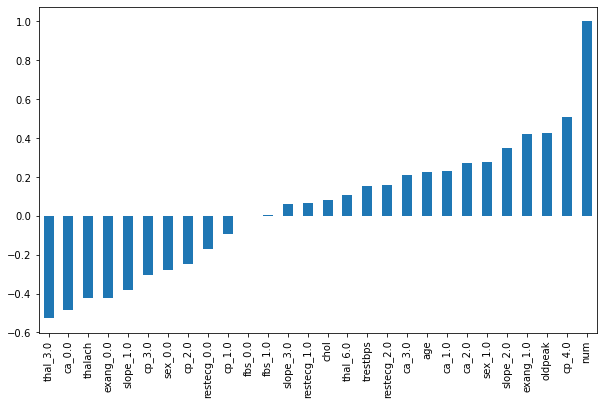

In [35]:
plt.figure(figsize=(10, 6))
df2.corr()['num'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

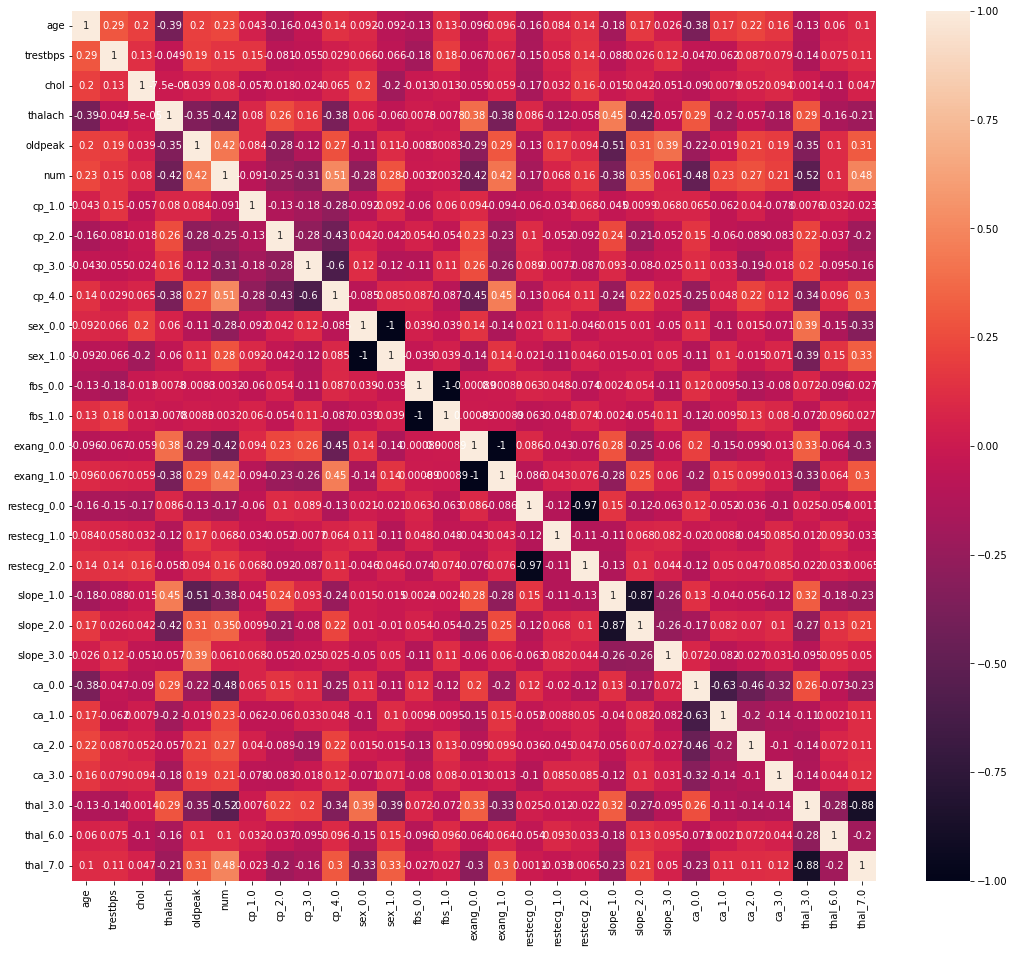

In [36]:
plt.figure(figsize=(18, 16))
sns.heatmap(df2.corr(), annot=True)

# Feature extraction

# ***Feature Extraction with PCA***

In [37]:
df2.to_csv('updated_cleveland.csv', index=False)
X = df2.drop('num', axis=1).values
Y = df2['num'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=150)

In [38]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
x_train.shape, y_train.shape

((207, 28), (207,))

In [40]:
x_test.shape, y_test.shape

((90, 28), (90,))

In [41]:
def get_models():
	models = dict()
	for i in range(1,25):
		steps = [('pca', PCA(n_components=i)), ('m', SVC(kernel='linear'))]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [45]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.836 (0.075)
>2 0.843 (0.075)
>3 0.846 (0.071)
>4 0.828 (0.076)
>5 0.835 (0.076)
>6 0.844 (0.069)
>7 0.846 (0.069)
>8 0.846 (0.078)
>9 0.829 (0.085)
>10 0.830 (0.079)
>11 0.825 (0.077)
>12 0.825 (0.081)
>13 0.826 (0.077)
>14 0.822 (0.080)
>15 0.815 (0.085)
>16 0.804 (0.087)
>17 0.801 (0.093)
>18 0.834 (0.081)
>19 0.822 (0.085)
>20 0.826 (0.084)
>21 0.826 (0.084)
>22 0.826 (0.084)
>23 0.826 (0.084)
>24 0.826 (0.084)


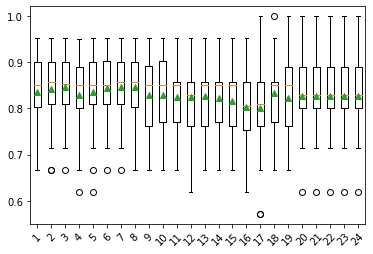

In [44]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [47]:
pca = PCA()
pca.fit(x_train)
pca.transform(x_train)

array([[ 1.98662765e+00, -1.91446901e-01, -2.28961222e-01, ...,
        -5.55111512e-16,  6.38378239e-16, -2.22044605e-16],
       [ 3.50402172e-01, -2.20794503e+00, -1.62671331e-01, ...,
         5.55111512e-17,  3.33066907e-16, -3.88578059e-16],
       [ 2.34204105e+00, -7.63952075e-02,  2.77830852e-01, ...,
         0.00000000e+00,  5.55111512e-16, -3.33066907e-16],
       ...,
       [-2.63748880e+00,  1.06737713e+00, -1.25583475e+00, ...,
         2.23707915e-16,  1.59447108e-16, -2.35301156e-17],
       [-1.94259602e+00,  1.48440225e+00, -1.11667939e+00, ...,
         2.23707915e-16,  1.59447108e-16,  4.20559094e-16],
       [ 2.12649905e+00,  4.60487037e+00, -1.47140566e+00, ...,
        -3.05311332e-16, -3.33066907e-16,  2.22044605e-16]])

C:\Users\myneee101\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


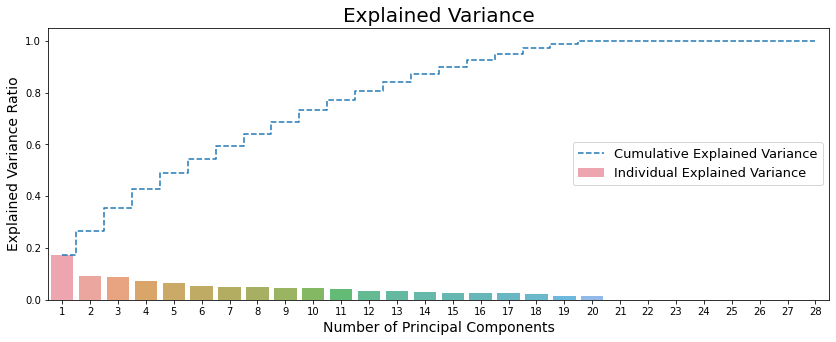

In [48]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(x_train.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', label='Cumulative Explained Variance')
sns.barplot(np.arange(1, x_train.shape[1]+1), pca.explained_variance_ratio_, alpha=0.85,
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);

# Independent Component Analysis (ICA)

In [49]:
X = df2.drop(['num'], axis = 1)
Y = df2['num']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [50]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [51]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)
forest_test(X_ica, Y)

0.6875
[[43 10]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        53
           1       0.75      0.81      0.78        37

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



# Linear Discriminant Analysis (LDA)

In [52]:
X = df2.drop(['num'], axis = 1)
Y = df2['num']

In [53]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,age,trestbps,chol,thalach,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,sex_0.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


# Recursive Feature Elimination

In [54]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 28)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(x_train,y_train)
RFE_X_Test = rfe.transform(x_test)
rfe = rfe.fit(RFE_X_Train,y_train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,y_test))

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=28 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.84375
Overall Accuracy using RFE:  0.8111111111111111


In [55]:
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 7)
RFE_X_Train = rfe.fit_transform(x_train,y_train)
model.fit(RFE_X_Train,y_train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(X.columns))
colcheck[colcheck == True].index

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Number of Features:  7
Selected Features: 


Index(['age', 'chol', 'thalach', 'oldpeak', 'cp_4.0', 'ca_0.0', 'thal_3.0'], dtype='object')

# SelectFromModel: Meta-transformer for selecting features based on importance weights.

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(x_train,y_train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(x_train)
Selected_X.shape

0.015625


(207, 9)

In [57]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, y_train)
print(time.process_time() - start)
Selected_X_Test = model.transform(x_test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

0.4375
[[39 13]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        52
           1       0.72      0.87      0.79        38

    accuracy                           0.80        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.82      0.80      0.80        90



Feature ranking:
1. feature 3 (0.155602)
2. feature 7 (0.129962)
3. feature 6 (0.116667)
4. feature 0 (0.110591)
5. feature 5 (0.106136)
6. feature 4 (0.100643)
7. feature 2 (0.098704)
8. feature 1 (0.093212)
9. feature 8 (0.088484)


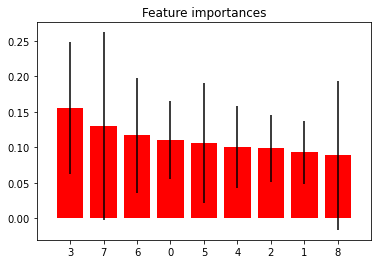

In [58]:
importances = trainedforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trainedforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Selected_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1, Selected_X.shape[1]])
plt.show()

# ***Feature Selection***

# Univariate Feature Selection

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X)

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=3).fit_transform(Scaled_X, Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30, random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

0.34375
[[42 11]
 [12 25]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        53
           1       0.69      0.68      0.68        37

    accuracy                           0.74        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.74      0.74      0.74        90



# Lasso Regression

In [61]:
from sklearn.linear_model import LassoCV
regr = LassoCV(cv=15, random_state=101)
regr.fit(x_train,y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(x_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

LassoCV Best Alpha Scored:  0.022205003619766395
LassoCV Model Accuracy:  0.45869428484148733
Variables Eliminated:  12
Variables Kept:  16


Text(0.5, 1.0, 'Most Important Features Identified using Lasso')

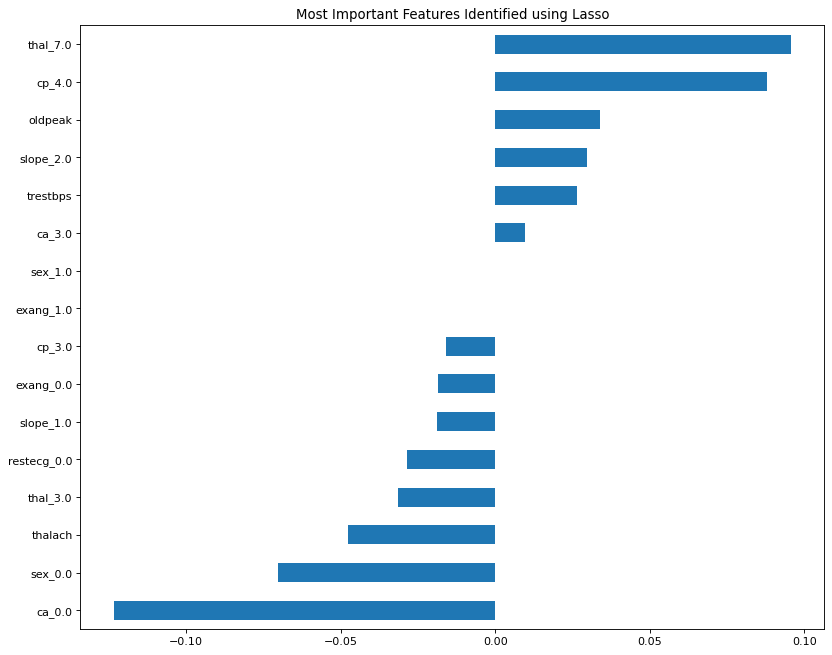

In [62]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso")

# ***Model Building***

In [63]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df3 = pd.read_csv("processed.cleveland.data", names=column_names, na_values=["?"])


In [64]:
df3 = pd.get_dummies(df3, columns=['cp'], dummy_na=False)
df3 = pd.get_dummies(df3, columns=['sex'], dummy_na=False)
df3 = pd.get_dummies(df3, columns=['fbs'], dummy_na=False)
df3 = pd.get_dummies(df3, columns=['exang'], dummy_na=False)
df3 = pd.get_dummies(df3, columns=['restecg'], dummy_na=False)
df3 = pd.get_dummies(df3, columns=['slope'], dummy_na=False)
df3 = pd.get_dummies(df3, columns=['ca'], dummy_na=False)
df3 = pd.get_dummies(df3, columns=['thal'], dummy_na=False)

In [65]:
df3['num'] = df3.apply(lambda x: (1 if x['num']>0 else 0), axis=1)

In [66]:
df3.to_csv('updated_cleveland_data.csv', index=False)

In [67]:
X = df3.drop('num', axis=1).values
Y = df3['num'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=150)

In [68]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
x_train.shape, y_train.shape

((212, 28), (212,))

In [70]:
x_test.shape, y_test.shape

((91, 28), (91,))

## ***SVM Model***

In [71]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [72]:
svm_predict = model.predict(x_test)

## ***ANN Model***

In [73]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(120,120,120), activation='relu', solver='adam', max_iter=400, early_stopping=True, random_state=101)

In [74]:
classifier.fit(x_train, y_train)
ann_predict = classifier.predict(x_test)

# ***Matrix Evaluation***

In [75]:
svm_cm = confusion_matrix(y_test, svm_predict)
svm_acc = accuracy_score(y_test, svm_predict)
svm_prec = precision_score(y_test, svm_predict)
svm_rec = recall_score(y_test, svm_predict)

ann_cm = confusion_matrix(y_test, ann_predict)
ann_acc = accuracy_score(y_test, ann_predict)
ann_prec = precision_score(y_test, ann_predict)
ann_rec = recall_score(y_test, ann_predict)

## ***Comparison Table***

In [76]:
print("SVM Accuracy: ", svm_acc, "----------", "ANN Accuracy: ", ann_acc)
print("SVM Precision: ", svm_prec, "----------", "ANN Precision: ", ann_prec)
print("SVM Recall: ", svm_rec, "----------", "ANN Recall: ", ann_rec)

SVM Accuracy:  0.8791208791208791 ---------- ANN Accuracy:  0.8901098901098901
SVM Precision:  0.8260869565217391 ---------- ANN Precision:  0.8780487804878049
SVM Recall:  0.926829268292683 ---------- ANN Recall:  0.8780487804878049


<AxesSubplot:title={'center':'ANN'}>

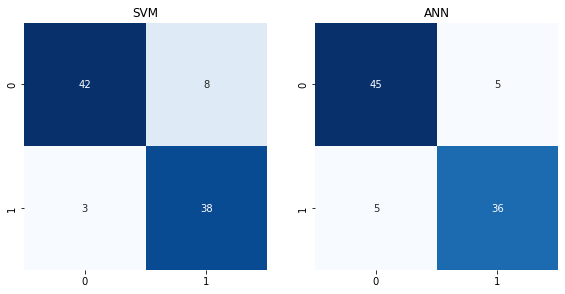

In [77]:
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
plt.title("SVM")
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.subplot(2, 4, 2)
plt.title("ANN")
sns.heatmap(ann_cm, annot=True, cmap="Blues", fmt="d", cbar=False)

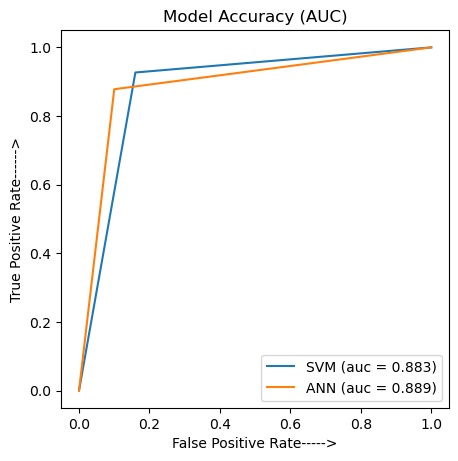

In [78]:
ann_fpr, ann_tpr, threshold = roc_curve(y_test, ann_predict)
auc_ann = auc(ann_fpr, ann_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_predict)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(ann_fpr, ann_tpr, linestyle='-', label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel("False Positive Rate----->")
plt.ylabel("True Positive Rate------>")

plt.title("Model Accuracy (AUC)")

plt.legend()
plt.show()